# Exercise 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.special import erfc
import os

In [2]:
np.random.seed(42)
os.makedirs('media', exist_ok=True)

### 1.1 Vibrating string

A. (0.5 point) Discretize the wave equation, and write it in a form suitable for
implementing in a computer program. Assume that the boundaries are fixed, 	(x =
0, t) = 0, 	(x = L, t) = 0. L is the length of the string. Take L = 1 for simplicity.
Divide the string in N intervals, so that the interval length is x = L/N. Also
consider the boundary cases.

In [3]:
def solve_wave(psi_init, L, c, T, Nx, dt):
    """Solves the wave equation using the finite difference method (explicit scheme) and returns the vibration amplitude psi(x,t) matrix of all time steps.
    
    Args:
    psi_init (function): Initial condition function to generate psi(x,0)
    L (float): Length of the string
    c (float): Wave speed
    T (float): Total time to simulate
    Nx (int): Total number of spatial intervals
    dt (float): Time step size
    """
    # Discretization
    dx = L/Nx # spatial step size
    Nt = int(T/dt)+1 # Total number of time steps
    psi = np.zeros((Nx, Nt)) # Vibration amplitude psi(x,t) matrix
    x = np.linspace(0, L, Nx) # spatial grid

    # Initial conditions
    psi[:,0] = psi_init(x)
    psi[:,1] = (1+dt)*psi[:,0] # approximated state at t=1

    # Physical boundaries at x=0 and x=L
    psi[0,:] = 0
    psi[-1,:] = 0

    # Stepping through time
    for t in range(2, Nt):
        for x in range(1, Nx-1): # exclude simulating at boundaries
            psi[x, t] = c**2 * (dt**2)/(dx**2) * (psi[x+1, t-1] + psi[x-1, t-1] - 2*psi[x, t-1]) - psi[x, t-2] + 2*psi[x, t-1]
    
    return psi

# Parameters
L = 1  # Length of the string
c = 1  # Wave speed
psi_init = lambda x: np.sin(2 * np.pi * x)

# Discretization
Nx = 100  # Total number of spatial intervals
dx = L / Nx  # Spatial step size
Nt = 1000  # Number of time steps to simulate
dt = 0.001  # Time step size

c = solve_wave(psi_init, L, c, Nt * dt, Nx, dt)
x = np.linspace(0, L, Nx)

B. (1 point) Implement the time stepping. Determine the time development of
the string, with the following initial conditions. The string is at rest at t = 0, i.e.
	′(x, t = 0) = 0.

i. 	(x, t = 0) = sin(2πx).

ii. 	(x, t = 0) = sin(5πx).

iii. 	(x, t = 0) = sin(5πx) if 1/5 < x < 2/5, else 	 = 0.

Take c = 1 and use the time step dt = 0.001. Plot the result at several times in
the same figure, e.g. varying the color of the curve.

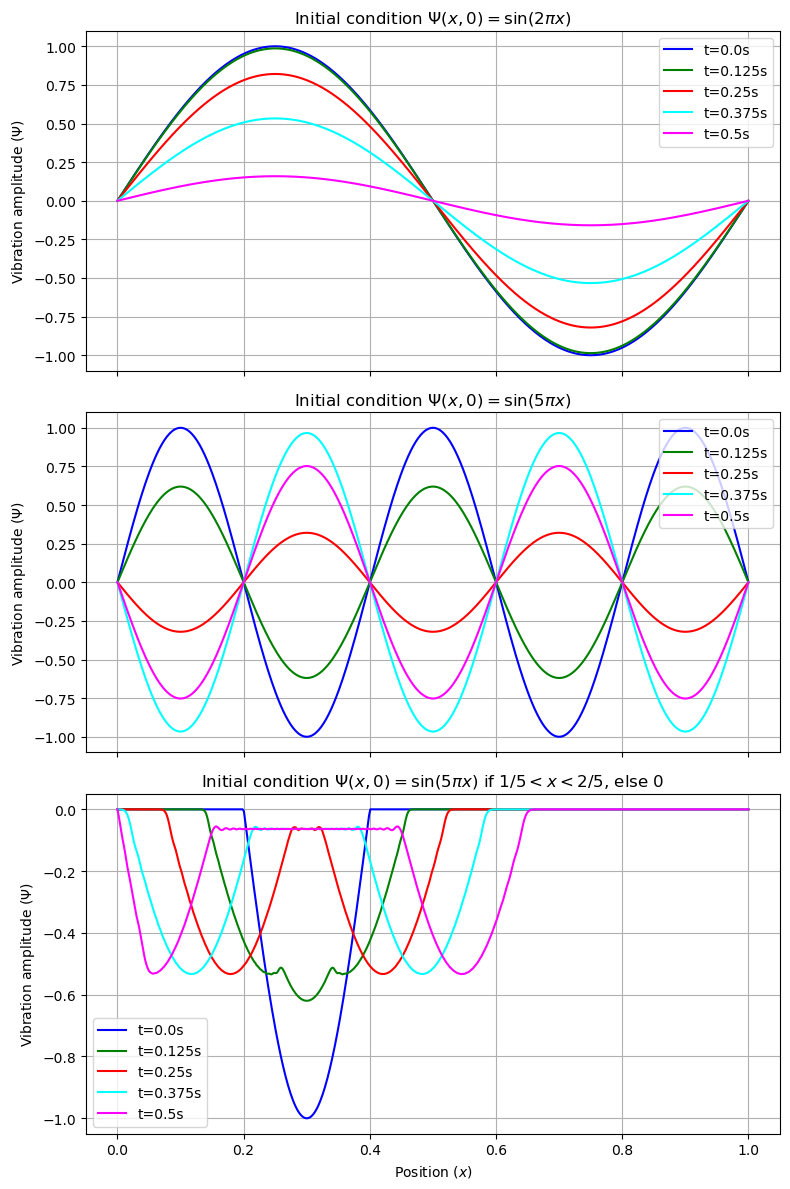

In [4]:
# Parameters
c = 1
L = 1

# Discretization
dt = 0.001
T = 0.5
Nx = 500
dx = L / Nx
Nt = int(T / dt)

init_conditions = [
    lambda x: np.sin(2 * np.pi * x),
    lambda x: np.sin(5 * np.pi * x),
    lambda x: np.where((1/5 < x) & (x < 2/5), np.sin(5 * np.pi * x), 0)
]

init_labels = [
    '$\\sin(2\\pi x)$',
    '$\\sin(5\\pi x)$',
    '$\\sin(5\\pi x)$ if $1/5 < x < 2/5$, else $0$'
]

psis = []
for i, (f0, init_label) in enumerate(zip(init_conditions, init_labels)):
    c = solve_wave(f0, L, c, T, Nx, dt)
    psis.append(c)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, layout='tight')
times = np.linspace(0, T, 5)
time_labels = [f't={t}s' for t in times]
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
x = np.linspace(0, L, Nx)

for i, (c, init_label) in enumerate(zip(psis, init_labels)):
    for j, (t, time_label, color) in enumerate(zip(times, time_labels, colors)):
        axs[i].plot(x, c[:, int(Nt*t)], label=time_label, color=color)
    axs[i].set_ylabel('Vibration amplitude ($\\Psi$)')
    axs[i].set_title(f'Initial condition $\\Psi(x,0)=${init_label}')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Position ($x$)')
plt.savefig('media/wave_equation.png', dpi=300, bbox_inches='tight')
plt.show()

C. (1 point) Make an animated plot of the time development.

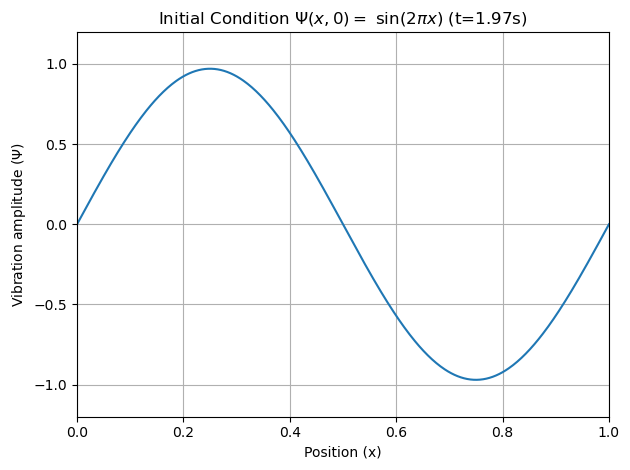

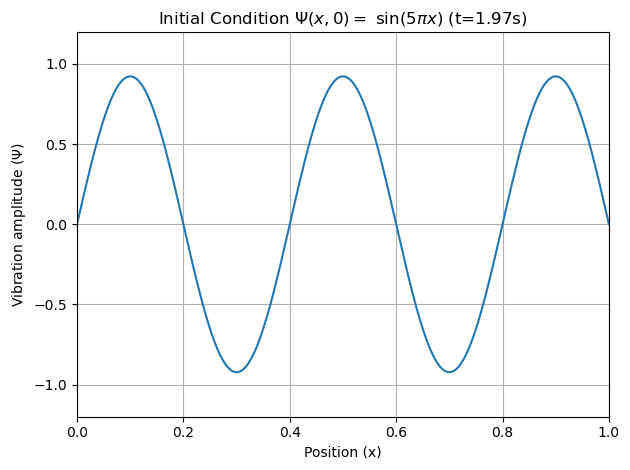

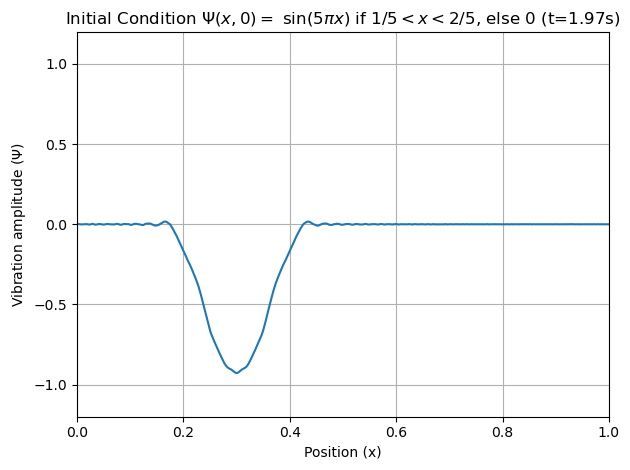

In [5]:
# Parameters
c = 1
L = 1

# Discretization
dt = 0.001
T = 2.0
Nx = 500
dx = L / Nx
Nt = int(T / dt)

def animate_wave(psi, title, file_title, L=1.0, T=1.0, total_frames=100, save=False):
    fig, ax = plt.subplots(layout='tight')
    x = np.linspace(0, L, psi.shape[0])
    plt.xlim(0, L)
    plt.ylim(-1.2, 1.2)
    plt.xlabel('Position (x)')
    plt.ylabel('Vibration amplitude ($\\Psi$)')
    plt.grid(True)
    line, = ax.plot(x, psi[:,0])

    # Calculate the frame interval based on the total number of frames
    frame_interval = int(psi.shape[1] / total_frames)

    def animate(i):
        line.set_ydata(psi[:,i * frame_interval])
        plt.title(title + f' (t={i * frame_interval / psi.shape[1] * T:.2f}s)')
        return line,

    anim = FuncAnimation(fig, animate, frames=total_frames, interval=1000//60, blit=True, repeat=True)
    if save:
        anim.save(f'media/{file_title}.gif', writer='ffmpeg')

for i, (c, init_label) in enumerate(zip(psis, init_labels)):
    c = solve_wave(init_conditions[i], L, c, T, Nx, dt)
    anim = animate_wave(c, f'Initial Condition $\\Psi(x,0) =$ {init_label}', f'animated_wave_{i}', T=T, total_frames=80, save=True)

### 1.2: Time Dependent Diffusion Equation

D. (0.5 point) Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A figure is extremely helpful for
figuring this out.

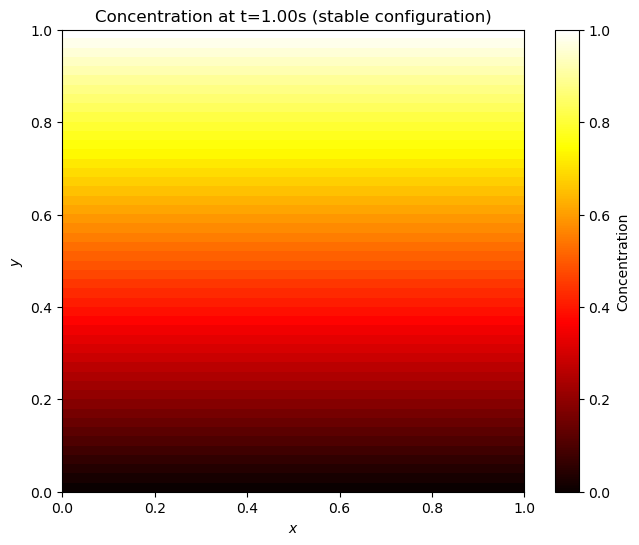

In [6]:
# Parameters
D = 1 # Diffusion coefficient
L = 1 # Length of the square spatial domain

T = 1.0
dt = 0.01
Nx = 50
dx = L / Nx

# Adjust time step based on stability condition
dt_stable = (dx**2) / (4 * D)  # Stability condition for dt
if dt > dt_stable:
    # TODO: double-checking @Jonas
    dt = dt_stable / 2  # Choose a dt smaller than the maximum stable dt to ensure stability 
Nt = int(T / dt)

# Initial & boundary conditions
c = np.zeros((Nx, Nx))
c[:, 0] = 0  # c(x, y=0) = 0
c[:, -1] = 1  # c(x, y=L) = 1

# Update function using vectorized operations for better performance
def update_vectorized(u):
    u_new = np.copy(u)
    u_new[1:-1, 1:-1] = u[1:-1, 1:-1] + (D * dt / dx**2) * (
        u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2] - 4 * u[1:-1, 1:-1])
    
    # Apply boundary conditions
    u_new[0, :] = u_new[-2, :]
    u_new[-1, :] = u_new[1, :]

    return u_new

# Re-run simulation with adjusted dt and vectorized update
for step in range(Nt):
    c = update_vectorized(c)

# Plotting the final state after adjustments
plt.figure(figsize=(8, 6))
plt.imshow(np.rot90(c, 3), origin='lower', cmap='hot', extent=(0, L, 0, L)) # TODO: cheated, this seems off
plt.colorbar(label='Concentration')
plt.title(f'Concentration at t={T:.2f}s (stable configuration)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('media/diffusion_stable.png', dpi=300, bbox_inches='tight')
plt.show()

E. (1 point) Test the correctness of your simulation. Compare to the analytic
solutions, plot c(y) for different times.

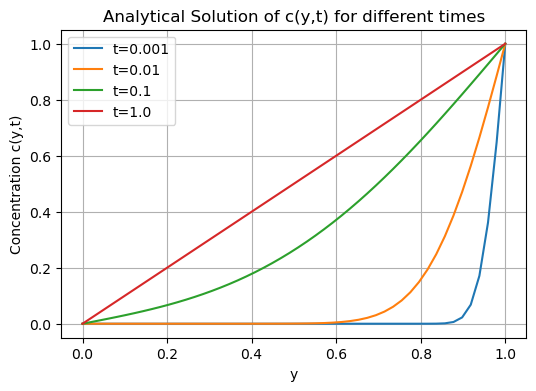

In [7]:
# Parameters and discretization identical to before

def solve_diffusion_analytical(y, t, terms=50):
    """Computes the analytical solution of the concentration c(y,t) using the error function."""
    result = 0
    for i in range(terms):
        result += erfc((1 - y + 2*i) / np.sqrt(4*D*t)) - erfc((1 + y + 2*i) / np.sqrt(4*D*t))
    return result

y_values = np.linspace(0, L, Nx)
time_values = np.logspace(-3, 0, 4)

plt.figure(figsize=(6, 4))
for t in time_values:
    plt.plot(y_values, solve_diffusion_analytical(y_values, t), label=f't={t}')

plt.title('Analytical Solution of c(y,t) for different times')
plt.xlabel('y')
plt.ylabel('Concentration c(y,t)')
plt.legend()
plt.grid(True)
plt.savefig('media/diffusion_analytical.png', dpi=300, bbox_inches='tight')
plt.show()


F. (1 point) Plot the results, show the 2D domain, with a color representing the
concentration at each point. Make a plot of the state of the system at several times:
t = {0, 0.001, 0.01, 0.1, and 1}.

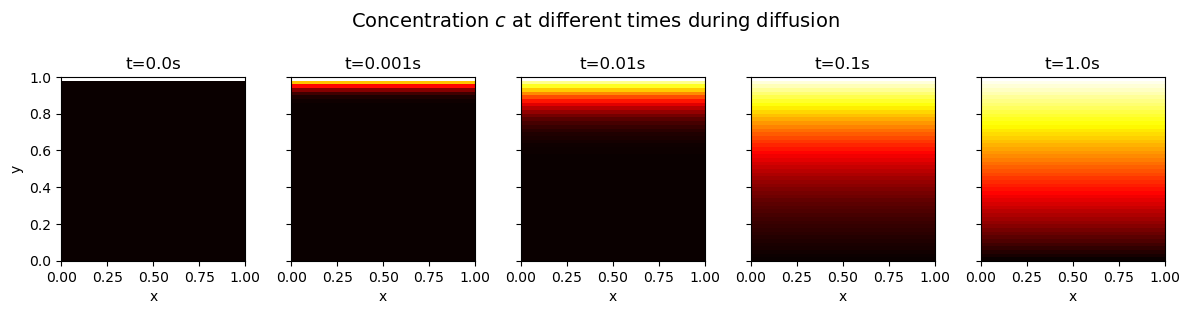

In [28]:
# Adjusted simulation to capture specific time states with a tolerance for floating-point comparison
def solve_diffusion(Nx, D, dx, dt, T):
    """
    Simulate diffusion (2D spatial + time) and return the concentration matrix.

    Parameters:
    - Nx: Number of spatial grid points in each dimension
    - D: Diffusion constant
    - dx: Distance between grid points
    - dt: Time step size
    - T: Total time to simulate

    Returns:
    - c: Concentration matrix at each time step
    """
    Nt = int(T / dt)

    # Initial & boundary conditions
    c = np.zeros((Nx, Nx, Nt + 1))
    c[:, 0] = 0
    c[:, -1] = 1
    
    for t in range(1, Nt + 1):
        c[1:-1, 1:-1, t] = c[1:-1, 1:-1, t-1] + (D * dt / dx**2) * (
            c[2:, 1:-1, t-1] + c[:-2, 1:-1, t-1] + c[1:-1, 2:, t-1] + c[1:-1, :-2, t-1] - 4 * c[1:-1, 1:-1, t-1])
        # Periodic boundary conditions
        c[0, :, t] = c[-2, :, t]
        c[-1, :, t] = c[1, :, t]
    
    return c

# Time points to capture the concentration
times_to_plot = np.array(np.array([0, 0.001, 0.01, 0.1, 1]) * Nt, dtype=int)

# Recalculate the simulation with tolerance for capturing times
c = solve_diffusion(Nx, D, dx, dt, T)

# Plotting with corrected results
fig, axs = plt.subplots(1, len(times_to_plot), figsize=(12, 4), sharey=True, layout='tight')
for i, t in enumerate(times_to_plot):
    axs[i].imshow(np.rot90(c[:,:,t], 3), extent=[0, L, 0, L], origin='lower', cmap='hot') # TODO: cheated, this seems off
    axs[i].set_title(f't={t/Nt}s')
    axs[i].set_xlabel('x')
axs[0].set_ylabel('y')

fig.suptitle('Concentration $c$ at different times during diffusion', y=0.85, fontsize=14)
plt.savefig('media/diffusion_tolerance.png', dpi=300, bbox_inches='tight')
plt.show()


G. (1 point) Make an animated plot of the time dependent diffusion equation until
equilibrium.

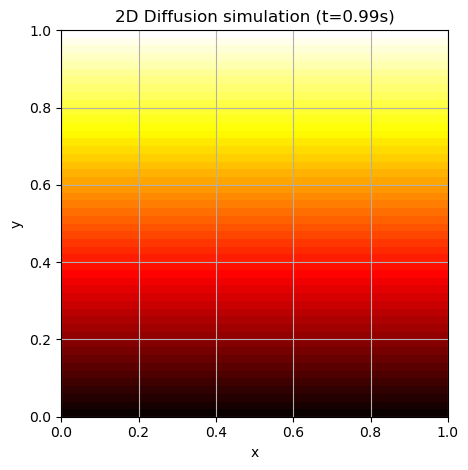

In [31]:
def animate_diffusion(c, title, file_title, L, T, total_frames=100, save=False):
    fig, _ = plt.subplots(layout='tight')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    grid = plt.imshow(np.rot90(c[:,:,0], 3), extent=[0, L, 0, L], origin='lower', cmap='hot')

    # Calculate the frame interval based on the total number of frames
    frame_interval = int(c.shape[2] / total_frames)

    def animate(i):
        grid.set_data(np.rot90(c[:,:, i * frame_interval], 3))
        plt.title(title + f' (t={i * frame_interval / c.shape[2] * T:.2f}s)')
        return grid,

    anim = FuncAnimation(fig, animate, frames=total_frames, interval=1000//60, blit=True, repeat=True)
    if save:
        anim.save(f'media/{file_title}.gif', writer='ffmpeg')

c = solve_diffusion(Nx, D, dx, dt, T)
anim = animate_diffusion(c, f'2D Diffusion simulation', f'2d_diffusion_simulation', L=L, T=T, total_frames=80, save=True)

### Laplace Equation

H. (1 point) Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N = 50. Test the methods by comparing the result to the analytical result in
eq. (5), i.e. the linear dependence of the concentration on y.

# COMPARE WITH ANALYTICAL

In [35]:
def jacobi(c, Nx):
    c_new = c.copy()
    for i in range(1, Nx+1):
        for j in range(1, Nx+1):
            c_new[i, j] = 0.25 * (c[i+1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1])
    return c_new

def gauss_seidel(c, Nx):
    for i in range(1, Nx+1):
        for j in range(1, Nx+1):
            c[i, j] = 0.25 * (c[i+1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1])
    return c

def sor_iter(c, Nx, omega):
    for i in range(1, Nx+1):
        for j in range(1, Nx+1):
            c[i, j] = (1-omega)*c[i, j] + omega*0.25*(c[i+1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1])
    return c

def check_convergence(c_old, c_new):
    return np.max(np.abs(c_new - c_old)) 

def solve_laplace(method, c, Nx, epsilon, omega=None):
    iteration = 0
    while True:
        c_old = c.copy()
        if method == 'jacobi':
            c = jacobi(c, Nx)
        elif method == 'gs':
            c = gauss_seidel(c, Nx)
        elif method == 'sor':
            c = sor_iter(c, Nx, omega)
        iteration += 1
        if check_convergence(c_old, c) < epsilon:
            break
    return c, iteration

# Discretization
Nx = 50
x = np.linspace(0, 1, Nx+2)
y = np.linspace(0, 1, Nx+2)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Parameters
sor_omega = 1.9
epsilon = 1e-5  # checking for convergence

# Initial conditions
c = np.zeros((Nx+2, Nx+2))  
c[:, 0] = y  
c[:, -1] = y 

# Solve the Laplace equation using different methods
c_jacobi, iterations_jacobi = solve_laplace('jacobi', c.copy(), Nx, epsilon)
print(f'Jacobi method: {iterations_jacobi} iter')
c_gs, iterations_gs = solve_laplace('gs', c.copy(), Nx, epsilon)
print(f'Gauss-Seidel method: {iterations_gs} iter')
c_sor, iterations_sor = solve_laplace('sor', c.copy(), Nx, epsilon, sor_omega)
print(f'Successive Over-Relaxation (SOR) method: {iterations_sor} iter')

Jacobi method: 2288 iter
Gauss-Seidel method: 1330 iter
Successive Over-Relaxation (SOR) method: 120 iter


I. (1 point) Show how the convergence measure δ in eq. (14) depends on the number
of iterations k for each of the methods. A log-lin plot may be suitable. For SOR,
choose a few representative values for ω.

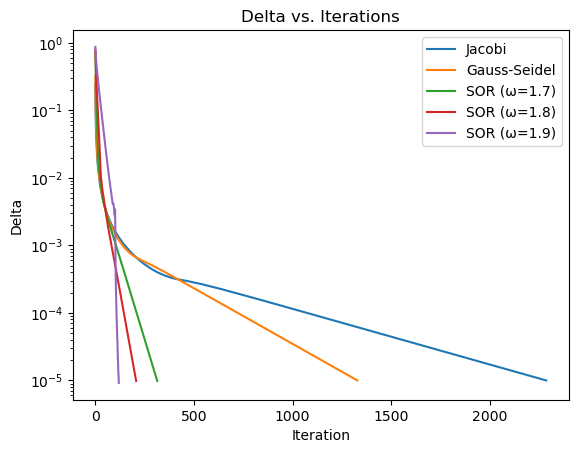

In [36]:
# Function to count iterations for each method
def track_delta(method, c, Nx, omega=None):
    deltas = []
    epsilon = 1e-5
    iteration = 0
    while True:
        c_old = c.copy()
        if method == 'jacobi':
            c = jacobi(c, Nx)
        elif method == 'gs':
            c = gauss_seidel(c, Nx)
        elif method == 'sor':
            c = sor_iter(c, Nx, omega)
        delta = np.max(np.abs(c_old - c))
        deltas.append(delta)
        iteration += 1
        if delta < epsilon:
            break
    return deltas

# Jacobi method
c = np.zeros((Nx+2, Nx+2))  
c[:, 0] = y  
c[:, -1] = y 
delta_jacobi = track_delta('jacobi', c.copy(), Nx)

# Gauss-Seidel method 
c = np.zeros((Nx+2, Nx+2))  
c[:, 0] = y  
c[:, -1] = y 
delta_gs = track_delta('gs', c.copy(), Nx)

# SOR method tested with many omega valces
omega_values = [1.7, 1.8, 1.9]
c = np.zeros((Nx+2, Nx+2))  
c[:, 0] = y  
c[:, -1] = y 
delta_sor = {omega: track_delta('sor', c.copy(), Nx, omega) for omega in omega_values}

# Plotting deltas against iterations
plt.plot(delta_jacobi, label='Jacobi')
plt.plot(delta_gs, label='Gauss-Seidel')
for sor_omega, deltas in delta_sor.items():
    plt.plot(deltas, label=f'SOR (ω={sor_omega})')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Delta')
plt.title('Delta vs. Iterations')
plt.legend()
plt.show()

J. (1 point) In the SOR method, find the optimal ω. How does it depend on N?.

# Optimize SOR iteration

In [ ]:
# Define grid sizes to test
grid_sizes = [20, 50, 100]  # different N sizes 
omega_range = np.linspace(1.7, 2.0, 5)  # range of omega to test


# find optimal ω for different grid sizes
# def omega_parameter(grid_sizes, omega_range):
optimal_omegas = {}
for Nx in grid_sizes:
    iterations_for_omegas = []
    for sor_omega in omega_range:
        # Setup the grid and boundary conditions again for each N
        c = np.zeros((Nx+2, Nx+2))  
        y_list = np.linspace(0, 1, Nx+2)
        c[:, 0] = y_list  
        c[:, -1] = y_list 
        _, iterations = solve_laplace('sor', c.copy(), Nx, sor_omega)
        iterations_for_omegas.append(iterations)
    
    # Omega with least iterations
    min_iterations = min(iterations_for_omegas)
    optimal_omega = omega_range[iterations_for_omegas.index(min_iterations)]
    optimal_omegas[Nx] = (optimal_omega, min_iterations)

    # return optimal_omegas

# Execute the function to find optimal ω for different grid sizes
# best_omega = omega_parameter(grid_sizes, omega_range)
# best_omega

K. (2 points) Implement the possibility to include objects into the computational
domain. The objects should be sinks. Experiment a little bit with some objects in
the computational domain (e.g. a rectangle or a few rectangles, ...). What is the
influence on the number of iterations. What about the optimal ω , is it influenced
by the presence of objects? Look at the resulting concentration fields, and try to
interpret what happens. The implementation in this exercise will also be used for
diffusion-limited aggregation in Set 2.

Converged in 273 iterations


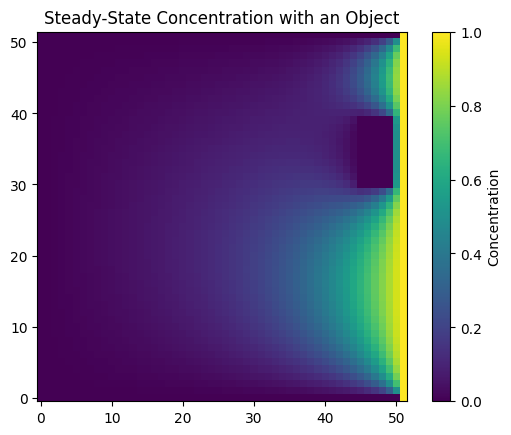

In [ ]:
# Parameters
Nx = 50  # Grid size
sor_omega = 1.7  # Over-relaxation parameter, to be adjusted based on experimentation
epsilon = 1e-5  # Convergence criteria
max_iterations = 10000  # Maximum number of iterations to prevent infinite loops

# Initialize the computational grid
c = np.zeros((Nx+2, Nx+2))
# Boundary conditions
c[:, 0] = 0  # Bottom
c[:, -1] = 1  # Top

# a rectangular object encoded in the domain
objects = np.zeros((Nx+1, Nx+1), dtype=int)
objects[3*Nx//5:4*Nx//5, 9*Nx//10:Nx] = 1  # Representing the object as a rectangle

def update(c, objects):
    c_new = c.copy()
    for i in range(1, Nx+1):
        for j in range(1, Nx+1):
            if objects[i, j] == 0:  # Check if the point is not part of an object
                c_new[i, j] = (1 - sor_omega) * c[i, j] + (sor_omega / 4) * (
                    c[i+1, j] + c_new[i-1, j] + c[i, j+1] + c_new[i, j-1]
                )
            else:
                c_new[i, j] = 0  # Set concentration to zero if it's part of an object
    return c_new

# Iteration
for iteration in range(max_iterations):
    c_new = update(c, objects)
    # Check for convergence
    delta = np.max(np.abs(c_new - c))
    if delta < epsilon:
        print(f"Converged in {iteration+1} iterations")
        break
    c = c_new
else:
    print("Maximum iterations reached without convergence")

# Plotting
plt.imshow(c, interpolation='nearest', origin='lower')
plt.colorbar(label='Concentration')
plt.title('Steady-State Concentration with an Object')
plt.show()
